# Tutoriel complet Regression linaire

## Collecter data en utilisant pandas

In [2]:
# modules nécessaires pour le notebook
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# lire le fichier de données
#utiliser le param index_col: Column to use as the row labels of the DataFrame
df = pd.read_csv('Advertising.csv', 
                 index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


# identification des descripteurs, cible et observations

Quels sont les descripteurs? On a 3 descripteurs dans ce dataset qui sont:

* TV
* Radio
* Newspaper

Quelle est la cible?

* Sales: vente d'un produit

Quelle est la forme ou shape du dataframe?

In [28]:
df.shape

(200, 4)

On voit que l'on a 200 observations avec 4 colonnes dont 3 sont des descripteurs

# Tracé des relations entre les descripteurs et la cible

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

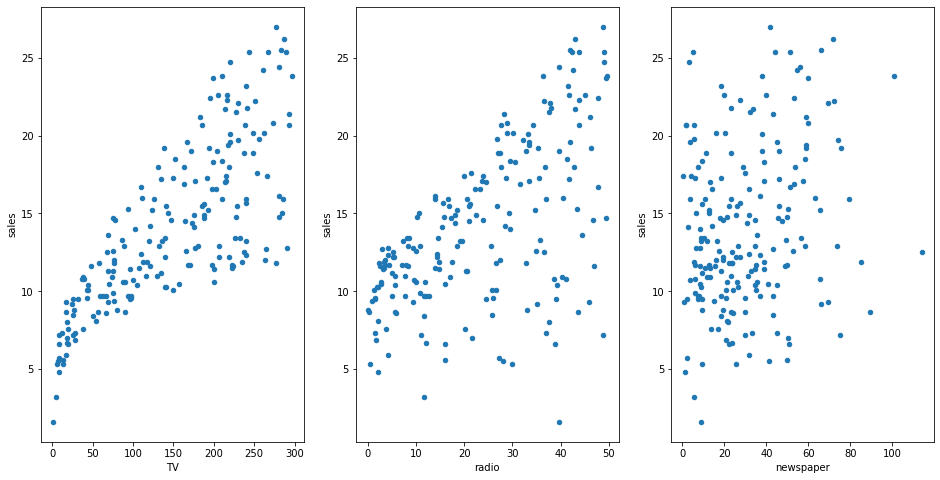

In [29]:
#utilisation d'une figure avec 3 plots aligné sur une ligne
fig, axes = plt.subplots(1,3,sharey=False)
df.plot(kind='scatter', x='TV', y='sales', 
        ax=axes[0], figsize=(16,8))
df.plot(kind='scatter', x='radio', y='sales', 
        ax=axes[1], figsize=(16,8))
df.plot(kind='scatter', x='newspaper', y='sales', 
        ax=axes[2], figsize=(16,8))

On voit au niveau des graphes qu'il existe une certaine relation linéaire entre TV et Sales ainsi que radio et Sales

# Tracé des correlations entre les différents descripteurs et cible

* On utilise ici seaborn pour avoir la matrice des correlations

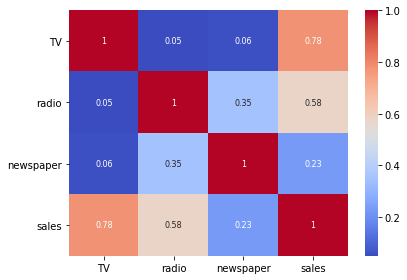

In [30]:
import seaborn as sns
#We can visualise the correlation between all the variables in the dataset using a heatmap in Seaborn
sns.heatmap(data=df.corr().round(2), 
            cmap='coolwarm', annot=True, annot_kws={"size":8})
plt.tight_layout()
plt.show()

On confirme qu'il n'y a pas vraiment de dépendance entre les descripteurs.

# Développement du modele linear regression

In [31]:
from sklearn.linear_model import LinearRegression
cols_predicteurs = ['TV','radio','newspaper']
#predicteurs
X = df[cols_predicteurs]
y = df.sales


In [32]:
#Effectuer la séparation Training-Test
from sklearn import model_selection 
 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, 
                                        y , test_size = 0.2, random_state=42)
#detail de chacun des sous-dataset
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(160, 3) (160,)
(40, 3) (40,)


In [33]:
#estimation des coeeficients du modele lineaire
lm = LinearRegression()
lm.fit(X_train,y_train)
#Afficher les coefficients
print(lm.intercept_)
print(lm.coef_)

2.979067338122629
[0.04472952 0.18919505 0.00276111]


In [34]:
#Afficher l'equation
list(zip(cols_predicteurs, lm.coef_))


[('TV', 0.044729517468716326),
 ('radio', 0.18919505423437658),
 ('newspaper', 0.002761114341367179)]

In [35]:
# proceder au test
y_pred = lm.predict(X_test)

In [36]:
import numpy as np
#comparer les valeurs test et prédites
test_pred_df = pd.DataFrame( { 'Valeurs test': y_test,
                'Valeurs prédites': np.round( y_pred, 2),
                'residuels': y_test - y_pred } )
test_pred_df[0:10]

,Valeurs test,Valeurs prédites,residuels
96,16.9,16.41,0.491976
16,22.4,20.89,1.510118
31,21.4,21.55,-0.153843
159,7.3,10.61,-3.308503
129,24.7,22.11,2.587627
116,12.6,13.11,-0.505592
70,22.3,21.06,1.242808
171,8.4,7.46,0.938990
175,11.5,13.61,-2.106346
46,14.9,15.16,-0.255070


In [37]:
 
from sklearn import metrics
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test,
                                         y_pred)))

#Calcul du R-squared
r2 = metrics.r2_score(y_test, y_pred)
print(r2)

1.7815996615334502
0.899438024100912


# Modele avec seulement TV et radio

In [38]:
cols_predicteurs = ['TV','radio']
#predicteurs
X = df[cols_predicteurs]
y = df.sales

#Effectuer la séparation Training-Test

 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y , test_size = 0.2)
#detail de chacun des sous-dataset
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

#estimation des coeeficients du modele lineaire
lm = LinearRegression()
lm.fit(X_train,y_train)
#Afficher les coefficients
print(lm.intercept_)
print(lm.coef_)

#Afficher l'equation
list(zip(cols_predicteurs, lm.coef_))

# proceder au test
y_pred = lm.predict(X_test)

#comparer les valeurs test et prédites
test_pred_df = pd.DataFrame( { 'Valeurs test': y_test,
                            'Valeurs prédites': np.round( y_pred, 2),
                            'residuels': y_test - y_pred } )
print(test_pred_df[0:10])



(160, 2) (160,)
(40, 2) (40,)
2.5993288950970257
[0.04743985 0.18781897]
     Valeurs test  Valeurs prédites  residuels
87           12.0             11.38   0.615989
69           18.9             19.03  -0.126572
175          11.5             13.79  -2.288537
119          15.9             15.49   0.406961
20           14.6             14.08   0.523907
80           11.0              9.55   1.451442
195          17.3             16.39   0.912570
118           9.4              6.37   3.026011
4            18.5             17.54   0.956610
34           17.4             18.96  -1.555734


In [39]:
 
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#Calcul du R-squared
r2 = metrics.r2_score(y_test, y_pred)
print(r2)

1.4917332709762494
0.8926388676218846


In [40]:
#Référence: The Elements of Statistical Learning - Hastie, Tibshirani and Friedman, voir https://web.stanford.edu/~hastie/ElemStatLearn/